In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Zomato-data-.csv', encoding='utf-8')
df['rate'] = df['rate'].astype(str).str.replace('/5','', regex=False).str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df = df.dropna(subset=['rate'])

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

Online Orders vs Average Rating

Shows whether restaurants that accept online orders have higher or lower ratings than offline-only ones.
Insight: Helps spot delivery issues affecting customer satisfaction.

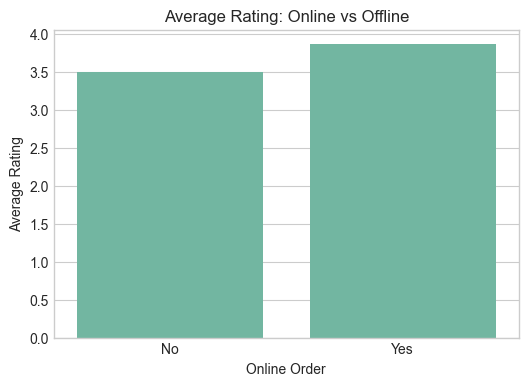

In [32]:
avg_rating_online = df.groupby('online_order')['rate'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='online_order', y='rate', data=avg_rating_online)
plt.title('Average Rating: Online vs Offline')
plt.xlabel('Online Order')
plt.ylabel('Average Rating')
plt.show()


Rating Distribution: Online vs Offline

Histogram comparing rating spread for online-order vs offline restaurants.   
Insight: Shows how many low/high ratings exist and highlights problem areas.

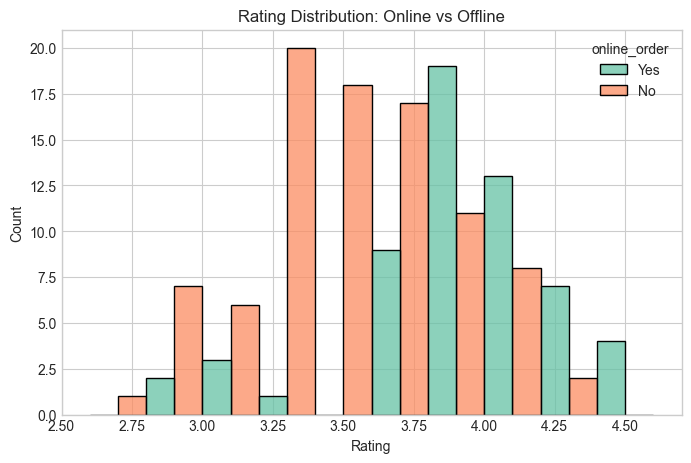

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='rate', hue='online_order', multiple='dodge', bins=10)
plt.title('Rating Distribution: Online vs Offline')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Votes vs Rating

Scatter plot of number of votes vs ratings, colored by online ordering.    
Insight: High votes but low rating = Popular but quality needs improvement.

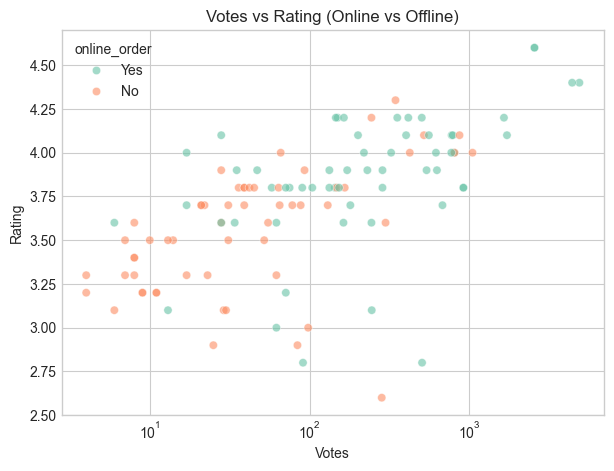

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='votes', y='rate', hue='online_order', data=df, alpha=0.6)
plt.title('Votes vs Rating (Online vs Offline)')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')  # optional, helps with large vote numbers
plt.show()

Top 10 Restaurants by Rating & Votes

Highlights best restaurants based on rating and number of votes.  
Insight: Benchmark top performers for strategy replication.

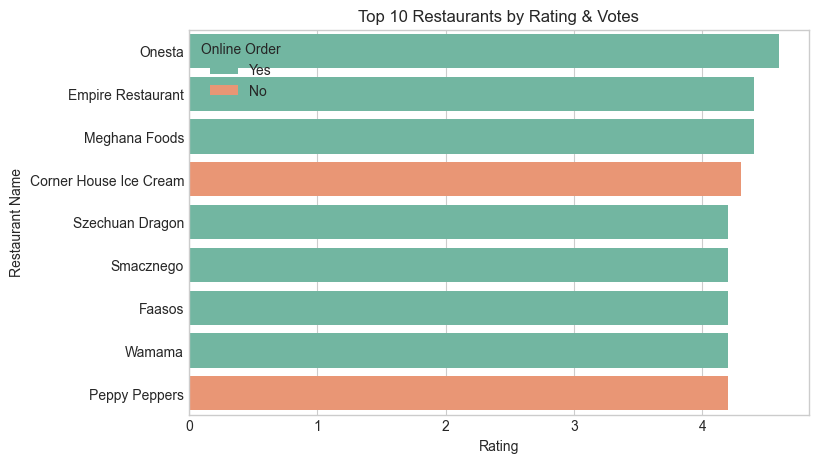

In [25]:
top10 = df.sort_values(by=['rate','votes'], ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x='rate', y='name', data=top10, hue='online_order')
plt.title('Top 10 Restaurants by Rating & Votes')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.legend(title='Online Order')
plt.show()


Top 10 Restaurants by Profitability Index

Bars showing (rating × votes) ÷ cost for top restaurants.     
Insight: Identifies restaurants that maximize profit while keeping customers happy.

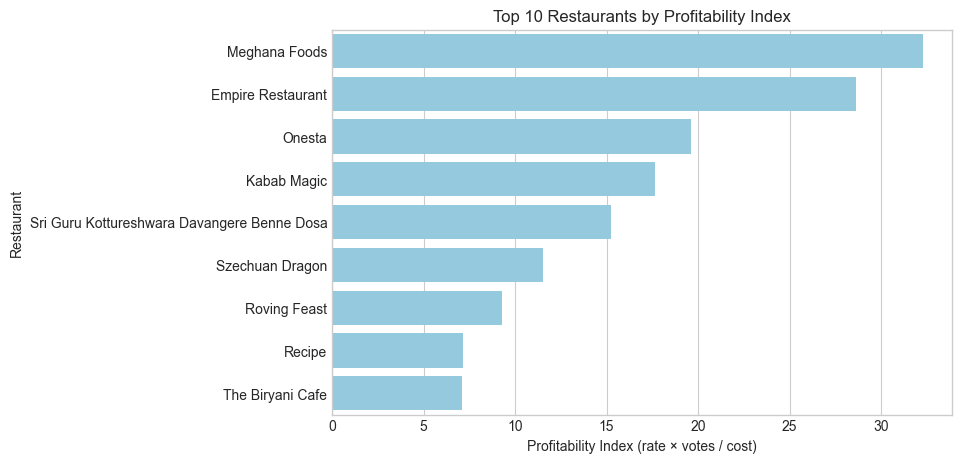

In [29]:
plt.figure(figsize=(8,5))
# Add legend=False and don't pass palette unless using hue
sns.barplot(x='profitability_index', y='name', data=top_profitable, color='skyblue', dodge=False)
plt.title('Top 10 Restaurants by Profitability Index')
plt.xlabel('Profitability Index (rate × votes / cost)')
plt.ylabel('Restaurant')
plt.show()

This Zomato data analysis uncovers patterns in ratings, orders, and pricing to help restaurants improve customer satisfaction. It highlights top cuisines, underperforming restaurants, and the optimal price range for maximum profit. Insights like votes vs ratings and profitability indices guide strategies to boost orders and revenue efficiently